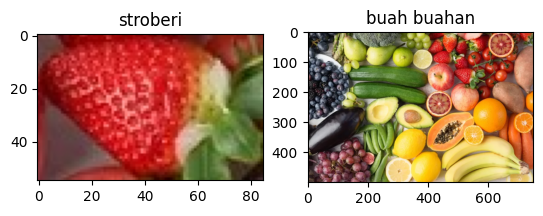

In [3]:
# tampilkan kedua gambar
import cv2
import numpy as np
from matplotlib import pyplot as plt
# panggil dan konversi warna agar sesuai dengan Matplotlib
stroberi = cv2.imread('stroberi.jpg')
stroberi = cv2.cvtColor(stroberi, cv2.COLOR_BGR2RGB)
# panggil dan konversi warna agar sesuai dengan Matplotlib
buah = cv2.imread('buah buahan.jpg')
buah = cv2.cvtColor(buah, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(stroberi), plt.title('stroberi')
plt.subplot(122),plt.imshow(buah), plt.title('buah buahan')
plt.show()

Jumlah objek ditemukan  48


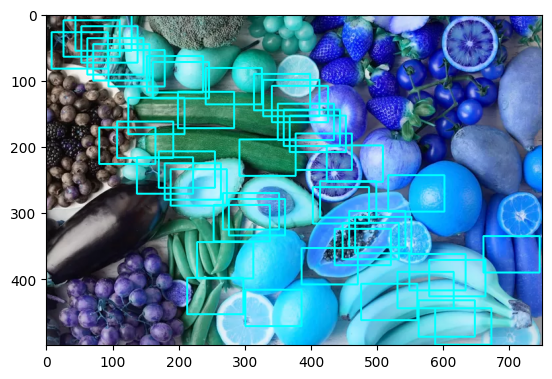

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('buah buahan.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
## membaca template
template = cv2.imread('stroberi.jpg',0)
## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]
# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)
## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0 # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
    ## jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        ## gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
        for i in range(((pt[0])-9), ((pt[0])+9),1):
            ## tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(((pt[1])-9), ((pt[1])+9),1):
            ## tambahkan koordinat y ke list
            lspoint2.append(k)
        count+=1 ### berapa jumlah matching yang ditemukan?
    else:
        continue
print ("Jumlah objek ditemukan ", count)

## tampilkan dengan imshow
plt.imshow(img_rgb)
plt.show()